In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2024-07-15'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace = True)

In [4]:
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.532528,16.573130,16.641375,16.248346,16.262545,147611217
1,2012-01-04,16.603836,16.644611,16.693678,16.453827,16.563665,114989399
2,2012-01-05,16.373516,16.413727,16.537264,16.344486,16.491436,131808205
3,2012-01-06,16.150156,16.189817,16.438385,16.184088,16.417213,108119746
4,2012-01-09,15.465409,15.503389,16.114599,15.472754,16.102144,233776981
...,...,...,...,...,...,...,...
3146,2024-07-08,190.229584,190.479996,191.679001,189.320007,191.365005,12097600
3147,2024-07-09,190.189636,190.440002,192.860001,190.229996,191.750000,10198500
3148,2024-07-10,192.406723,192.660004,193.309998,190.619995,190.750000,12052900


In [5]:
ma_100_days = data.Close.rolling(100).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

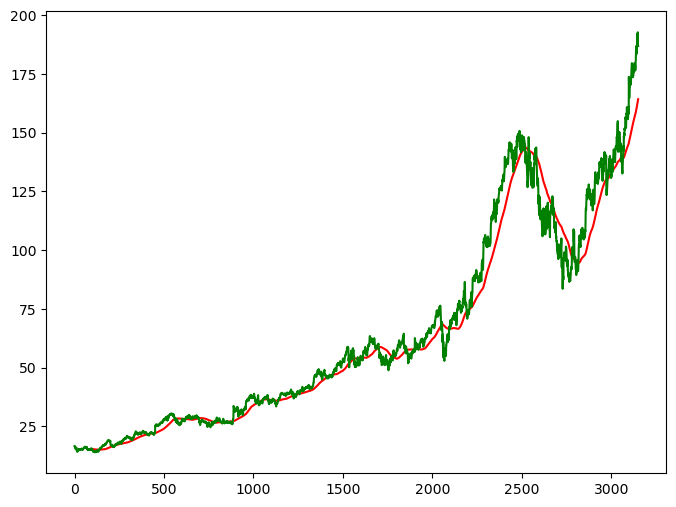

In [6]:
plt.figure(figsize = (8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show

In [7]:
ma_200_days = data.Close.rolling(200).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

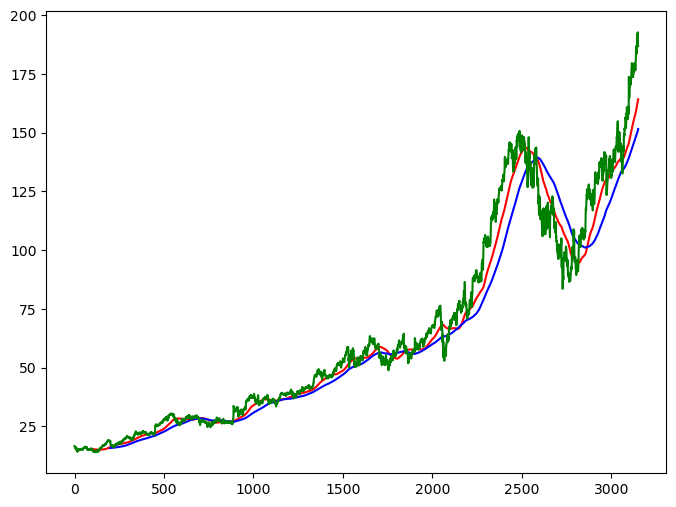

In [8]:
plt.figure(figsize = (8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show

In [9]:
data.dropna(inplace = True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0], data_test.shape[0]

(2520, 631)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [13]:
data_train_scale = scaler.fit_transform(data_train)

In [14]:
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i, 0])    

In [15]:
x, y = np.array(x), np.array(y)

In [16]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [17]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1], 1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

\\?\C:\Users\rayya\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
model.fit(x, y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 16s 120ms/step - loss: 0.0502
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 0.0060
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 0.0044
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0035
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - loss: 0.0032
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - loss: 0.0032
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - loss: 0.0037
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - loss: 0.0032
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - loss: 0.0026
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - loss: 0.0027
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - loss: 0.0027
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - loss: 0.0024
Epoch 13/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - loss: 0.0022
Epoch 14/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - loss: 0.0023
Epoch 15/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step 

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [21]:
past_100_days = data_train.tail(100)

In [22]:
data_test = pd.concat([past_100_days, data_test], ignore_index = True)

In [23]:
data_test_scale = scaler.fit_transform(data_test)

In [24]:
x = []
y = []
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i, 0])
x, y = np.array(x), np.array(y)

In [25]:
y_predict = model.predict(x)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


In [26]:
scale = 1/scaler.scale_

In [27]:
y_predict = y_predict*scale

In [28]:
y = y*scale

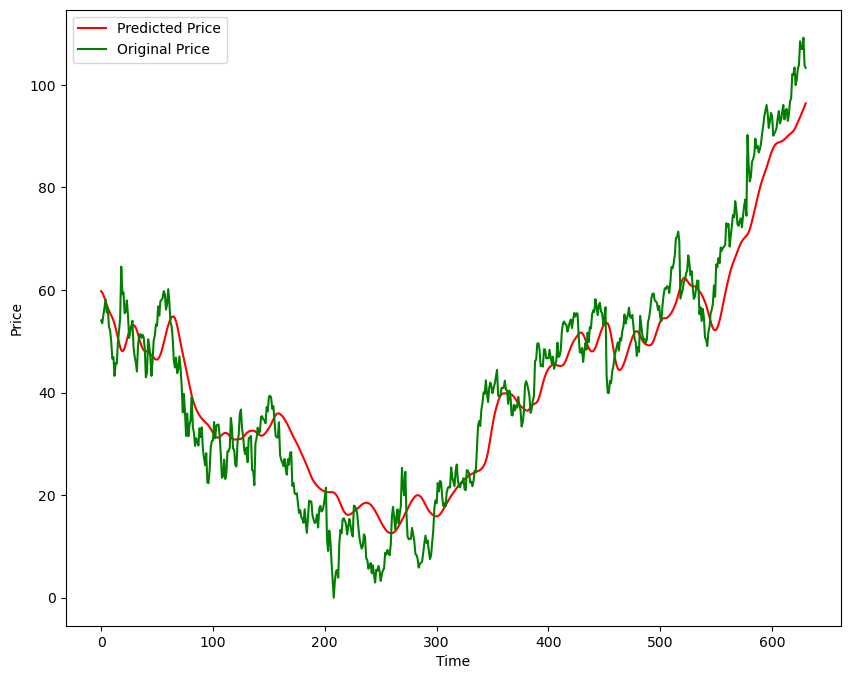

In [29]:
plt.figure(figsize = (10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [30]:
model.save('Stock Predictions Model.keras')